<a href="https://colab.research.google.com/github/AikaHorizon333/pythonprojects/blob/main/Karplus_Strong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Karlplus - Strong Algorithm

The Karlplus - Strong algorithm is a simple digital feedback loop. It has an internal buffer of $M$ samples. 

The buffer is filled with a set of initial values and the loop, with running, produces an arbitraryly long output signal.

The K-S loop can be used to synthesize musical sounds. 

The *CCDE* is: 

 y[n] = x[n] + a y[n-M] 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
import librosa.display
%matplotlib inline 

In [ ]:
# implementation of the K-S Algorithms as a function

# We are going to pass  the N-samples ( Nyquist Frequency of the signal)
def KS_1 ( x, N):
  #This is going to append and concatenate identical copies of the buffer
  y = x

  #We need to copy and paste the values of x in y N times
  while(len(y) < N):
    # x is appened to a copy of y 
    y = np.append(y,x)
  
  #Trim the excess
  y = y[0:N+1]
  return y


### Sample Rate

In order to implement the K-S algorithm we need to stablish an internal clock. This is the sample rate of the system. 

The Sample Rate is the number of samples taken in one second. 

The sample rate is dettermined by the Nyquist Theorem. The sample rate is defined as the double of the maximum frequency sampled in the system. 



SR = 2 MaxFrequency. (Hz)



In [ ]:
SR = 32000 #Let's try to sample up to 16 kHz.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


[Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Samples')]

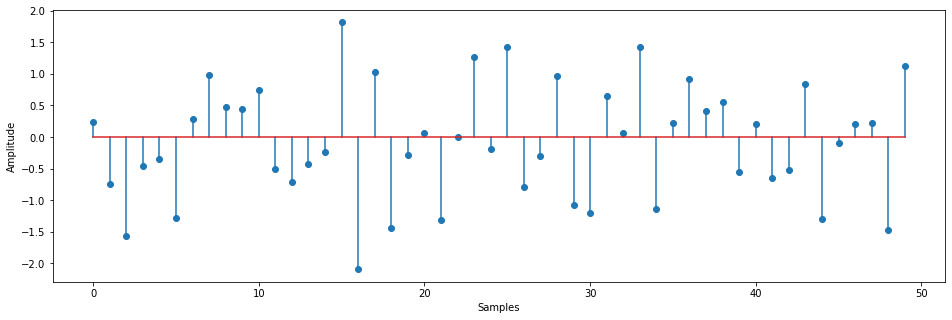

In [ ]:
# Lets create a dummy signal to test the algorithm of 50 samples,

#Lets fix the seed to replicate the experiment later. 
np.random.seed(34)
random_signal = np.random.randn(50)
#Display the signal.
fig,ax = plt.subplots(figsize=(16,5))
ax.stem(random_signal);
ax.set(xlabel="Samples", ylabel="Amplitude")


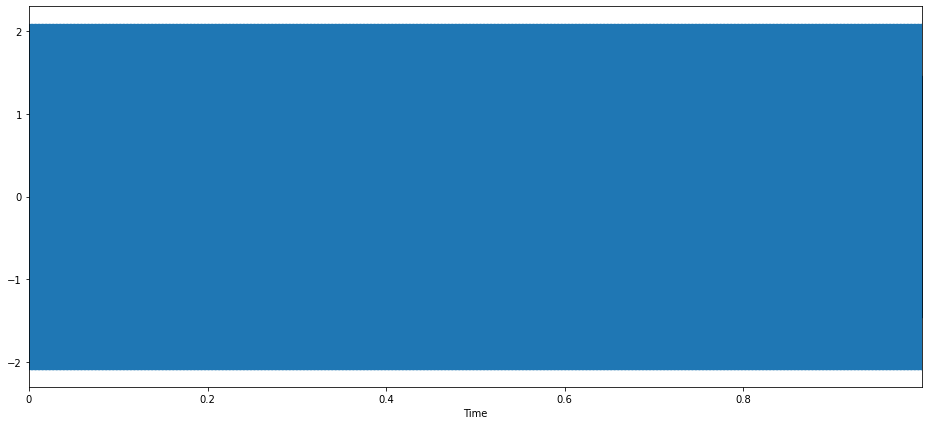

In [ ]:
#Let's try the K-S implementation. 

#Remember, we are copying and pasting the random_signal SR times to the output. 

output = KS_1(random_signal,SR)
#Display the Waveform
plt.figure(figsize=(16,7))
librosa.display.waveplot(output,SR)

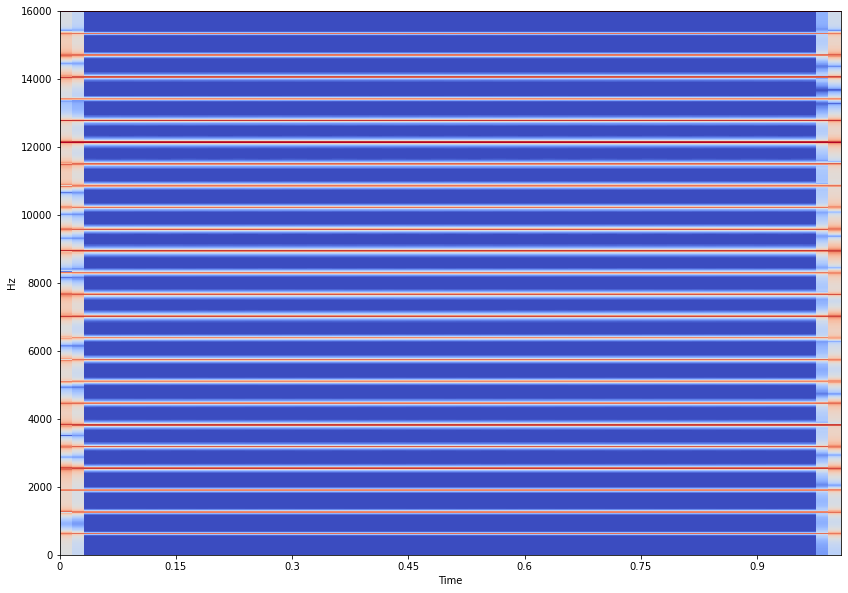

In [ ]:
X = librosa.stft(output)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 10))
librosa.display.specshow(Xdb, sr=SR, x_axis='time', y_axis='hz')

With the Sample Rate of 32000 the frequency of the output can be calculated with the number of samples of the input ( input vector ). 

Frequency = SR / vector samples 

For this case 32000/50 = 640 Hz 

this is almost E5 on the piano. 

In [ ]:
#Display the sound 
IPython.display.Audio(output,rate=SR)

In [ ]:
#Make it lower by doubling the samples. 

np.random.seed(34)
random_signal_2 = np.random.randn(100)

output_2 = KS_1(random_signal_2, 2*SR)

IPython.display.Audio(output_2, rate=SR)


Assuming that the input is the finite support signal: 

$$
x[n] = \begin{cases}
    0 & \mbox{for $n < 0$} \\
    b_n & \mbox{for $0 \le n < M$} \\
    0 & \mbox{for $n \ge M$}
  \end{cases}
$$


Let's implement the algorithm as a signal processing loop

In [ ]:
def KS_2 (x,N):
  #Length of the input ( Is this the buffer? )
  M = len(x)
  #prepare the output  ( Creating the array of the proper size)
  y = np.zeros(N)
  for n in range (0,N):
    y[n] = (x[n] if n<M else 0 ) + ( y[n-M] if n-M >= 0 else 0)
  return y


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


[Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Samples')]

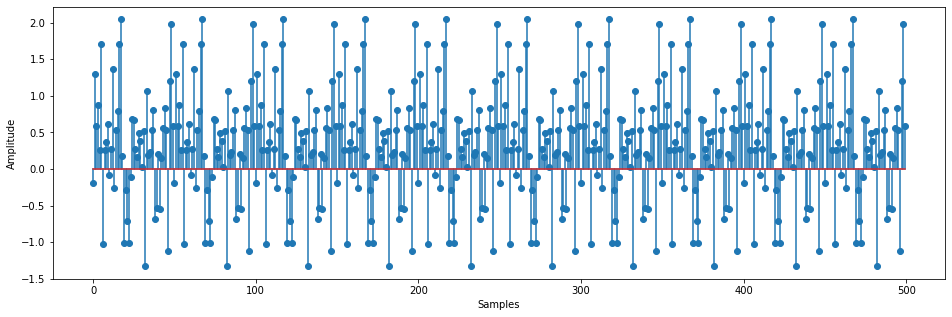

In [ ]:
# Testing the algorithm 

input_signal_3 = np.random.randn(50)
output = KS_2(input_signal_3,SR)

fig, ax = plt.subplots( figsize=(16,5))

ax.stem(output[0:500]);

ax.set(xlabel="Samples", ylabel="Amplitude")


In [ ]:
IPython.display.Audio(output, rate=SR)

The final implementation of the KS algoryhtm includes the feedback gain factor $\alpha$.

The $\alpha$ factor adds realism to the sythetized sound y providing a decay factor. 

The value of $\alpha$ ranges between 0 and 1. More than 1 the filter will blow-up.



In [ ]:

# We will be passing the input signal x, the SR and the alpha factor.
# The alpha will be initialized in 0.99

def KS_3(x,N, alpha=0.99):
 
  #Length of the input signal:
  M = len(x) 
  
  #Initialize the output array ( buffer ? ).
  #N is the number of samples in 1 second.
  y = np.zeros(N)

  #KS updtated algorithm
  for n in range(0,N):
    y[n] = (x[n] if n < M else 0) + alpha *(y[n-M] if n-M >= 0 else 0)

  return y




In [ ]:
#Testing the new algorithm. 

np.random.seed(74)

input_signal_4 = np.random.randn(100)
output = KS_3(input_signal_4, SR, alpha=0.99)

#Display the Waveform. 

plt.figure(figsize=(16,5))
librosa.display.waveplot(output,sr=SR)


NameError: ignored

In [ ]:
#Display the Spectrogram. 

X = librosa.stft(output)
#Get rid off the complex part by abs. 
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(16,8))
librosa.display.specshow(Xdb, sr=SR, x_axis="time", y_axis="hz")

In [ ]:
#Lets hear the result. 
IPython.display.Audio(output, rate=SR)

### Alpha Correction 

Cosidering the output of a dampened  K-S loop; everytime the initial buffer goes through the loop, it get multiplied by $\alpha$. So, we can write. 

$$
  y[n] = \alpha^{ n/M }x[n \mod N]
$$

The decay envelope is dependant of $\alpha$ and $M$, the higher the pitch of the note, the faster its decay.

Is necesessary to write a correction to compensate for the $\alpha$ effect. 



In [ ]:
def KS ( x, N, alpha =0.99):
  #Adjustment of alpha to all the notes have the same decay. 

  REF_LEN = 50

  M = len(x)
  a = alpha**(float(M)/REF_LEN) #The alpha effect
  y=np.zeros(N)

  #The KS algorithm

  for n in range(0,N):
    y[n] = (x[n] if n<M else 0)+ a*(y[n-M]if n-M >= 0 else 0)

  return y
  

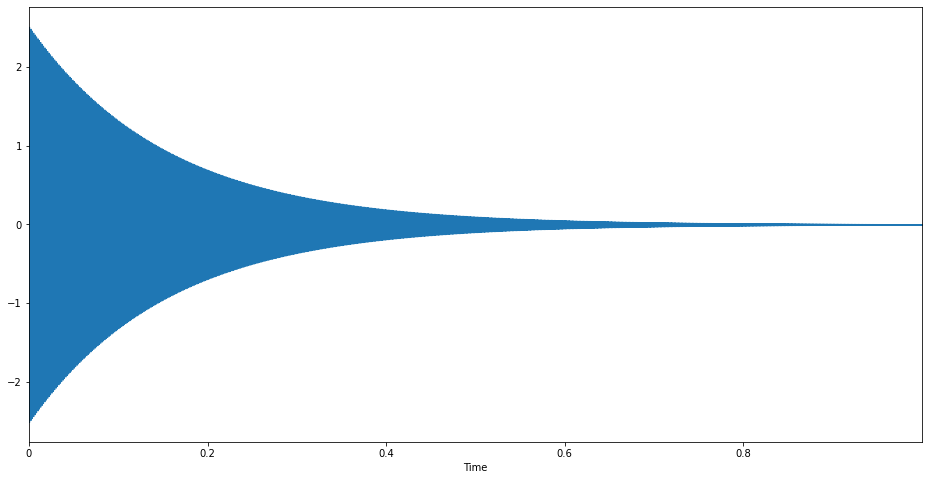

In [ ]:
input_signal_5 = np.random.randn(50)
output = KS(input_signal_5, SR)

plt.figure(figsize=(16,8))
librosa.display.waveplot(output, sr=SR)


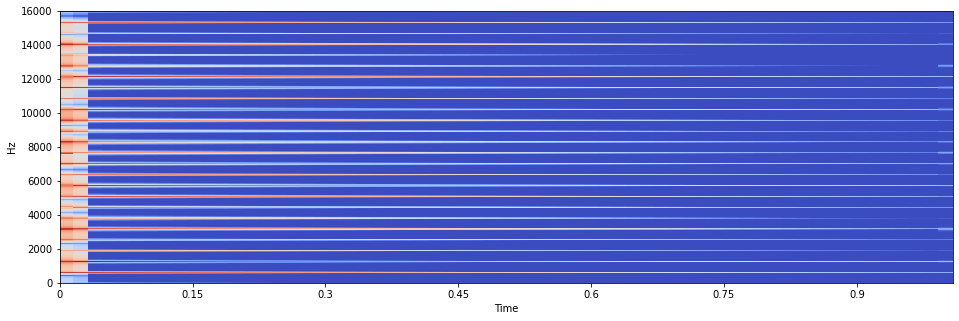

In [ ]:
#Plot the spectrogram
X = librosa.stft(output)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(16,5))
librosa.display.specshow(Xdb,sr=SR, x_axis="time", y_axis="hz")

In [ ]:
#Display the audio

IPython.display.Audio(output, rate=SR)